<a href="https://colab.research.google.com/github/EZagoruyko/Medical-Records/blob/main/MedRecords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Датасет: Medical Transcriptions, источник: https://www.kaggle.com/datasets/tboyle10/medicaltranscriptions**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/sample_data/mtsamples.csv', engine = 'python')
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [5]:
df.shape

(4999, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
 4   keywords           3931 non-null   object
dtypes: object(5)
memory usage: 195.4+ KB


In [7]:
cols_null_percent = df.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

keywords         21.364273
transcription     0.660132
dtype: float64

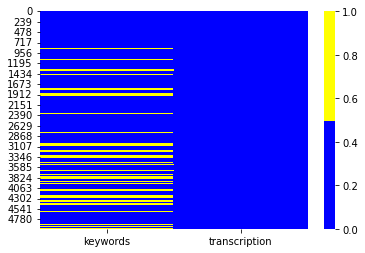

In [8]:
colors = ['blue', 'yellow'] 
fig = plt.figure()
cols = cols_with_null.index
ax = sns.heatmap(
    df[cols].isnull(),
    cmap=sns.color_palette(colors),
)

In [9]:
pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.9 MB/s 
     |████████████████████████████████| 237 kB 28.0 MB/s 
     |████████████████████████████████| 51 kB 8.5 MB/s 
     |████████████████████████████████| 5.8 MB 66.9 MB/s 
     |████████████████████████████████| 1.3 MB 67.7 MB/s 
     |████████████████████████████████| 182 kB 78.8 MB/s 
     |████████████████████████████████| 7.6 MB 69.2 MB/s 
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23800 sha256=08c6ab5f41470f5a4c4776cd4e8259f5eec73a6fced964bc81e316798db52311
  Stored in directory: /root/.cache/pip/wheels/6c/bc/8b/a51bee77aec33895e6c8c236144b4cc10875659c4d2c80f070
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=622406363c81a32f78cceb4b638eb09ade5711a15746ad623874620440913a5e
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88

In [10]:
# используя нейросеть, заполняем пропущенные значения в столбце "keywords"

In [11]:
from keybert import KeyBERT

for i in range(df.shape[0]):
  if df['keywords'][i] is np.nan:
    doc = df['transcription'][i]
    kw_model = KeyBERT()
    keywords = kw_model.extract_keywords(doc)
    lst = []
    for elem in keywords:
      lst.append(elem[0])
      kwds = ' '.join(lst)
      df['keywords'][i] = kwds

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [12]:
for i in range(df.shape[0]):
  df['keywords'][i] = df['keywords'][i].replace(',', '')

In [13]:
df.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...",allergy / immunology allergic rhinitis allergi...
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...",bariatrics laparoscopic gastric bypass weight ...
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...",bariatrics laparoscopic gastric bypass heart a...
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...",cardiovascular / pulmonary 2-d m-mode doppler ...
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,cardiovascular / pulmonary 2-d doppler echocar...


In [14]:
# подсчитываем число уникальных ключевых слов в датасете

all_keywords = set()
for i in range(df.shape[0]):
  lst = df['keywords'][i].split()
  all_keywords.update(lst)

len(all_keywords)


6360

In [58]:
# функция для подсчета частоты встречаемости слов в списке (словарь, в котором ключевые слова расположены по убыванию по частоте)

def frequencies(word_list):
    dct = {}
    word_num = len(word_list)
    for word in word_list:
        if word not in dct:
            word_frequency = round(word_list.count(word) * 100/word_num, 3)
            dct[word] = word_frequency
            
    sorted_dct = {}
    sorted_keys = sorted(dct, key=dct.get, reverse = True)
    for w in sorted_keys:
        sorted_dct[w] = dct[w]
    
    return sorted_dct

In [59]:
# посмотрим на словарь частоты встречаемости ключевых слов для специальности 'Dentistry' 

df_aggr_1 = df.groupby('medical_specialty').agg({'keywords':'sum'}).reset_index()
df_aggr_1

,medical_specialty,keywords
0,Allergy / Immunology,allergy / immunology allergic rhinitis allergi...
1,Autopsy,tachycardia defibrillation bradycardia cardiac...
2,Bariatrics,bariatrics laparoscopic gastric bypass weight ...
3,Cardiovascular / Pulmonary,cardiovascular / pulmonary 2-d m-mode doppler ...
4,Chiropractic,wellbutrin medications treatment medication sy...
5,Consult - History and Phy.,consult - history and phy. well-child check de...
6,Cosmetic / Plastic Surgery,cosmetic / plastic surgery nasal obstruction c...
7,Dentistry,dentistry intraoral bony impacted teeth throat...
8,Dermatology,dermatology k-y jelly darkened mole scalp mole...
9,Diets and Nutritions,diets and nutritions overeaters anonymous diab...


In [60]:
frequencies(df_aggr_1['keywords'][7].split())

{'dental': 5.431,
 'teeth': 5.056,
 'mandible': 2.622,
 'dentistry': 2.434,
 'tooth': 2.434,
 'extraction': 2.06,
 'fracture': 2.06,
 'buccal': 1.873,
 'caries': 1.873,
 'throat': 1.685,
 'pack': 1.685,
 'abscess': 1.498,
 'mandibular': 1.498,
 'space': 1.498,
 'carious': 1.311,
 'incision': 1.311,
 'drainage': 1.124,
 'facial': 1.124,
 'impacted': 0.936,
 'oral': 0.936,
 'osteotomy': 0.749,
 'le': 0.749,
 'fort': 0.749,
 'of': 0.749,
 'maxillary': 0.749,
 'and': 0.749,
 'infection': 0.749,
 'anesthesia': 0.749,
 'bone': 0.749,
 'extractions': 0.749,
 'rehabilitation': 0.749,
 'wisdom': 0.749,
 'intraoral': 0.562,
 'bony': 0.562,
 'disease': 0.562,
 'toothache': 0.562,
 'tube': 0.562,
 'forceps': 0.562,
 'molar': 0.562,
 'endotracheal': 0.562,
 'pacu': 0.562,
 'surgery': 0.562,
 'fractures': 0.562,
 'symphysis': 0.562,
 'open': 0.562,
 'reduction': 0.562,
 'iliac': 0.562,
 'crest': 0.562,
 'necrotic': 0.562,
 'mouth': 0.562,
 'restorative': 0.562,
 'prophylaxis': 0.562,
 'block': 0.562

In [70]:
df['age'] = np.nan
df['sex'] = np.nan

In [71]:
# из столбца 'transcription' выделяем новые признаки - пол и возраст пациента

In [72]:
for i in range(df.shape[0]):
  word_list = str(df['transcription'][i]).split()
  if 'female' in word_list:
    df['sex'][i] = 'female'
  if 'male' in word_list:
    df['sex'][i] = 'male'

<ipython-input-72-ee2872435b64>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'][i] = 'female'
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [73]:
for i in range(df.shape[0]):
  word_list = str(df['transcription'][i]).split()
  for word in word_list:
    if word.find('year') != -1:
      num = str()
      for char in word:
        if char.isdigit():
          num = num + char
          df['age'][i] = num

<ipython-input-73-1bb4356226b2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'][i] = num


In [74]:
df.head()

,description,medical_specialty,sample_name,transcription,keywords,age,sex
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...",allergy / immunology allergic rhinitis allergi...,23.0,female
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...",bariatrics laparoscopic gastric bypass weight ...,NaN,NaN
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...",bariatrics laparoscopic gastric bypass heart a...,NaN,NaN
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...",cardiovascular / pulmonary 2-d m-mode doppler ...,NaN,NaN
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,cardiovascular / pulmonary 2-d doppler echocar...,NaN,NaN


In [75]:
cols_null_percent = df.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

sex              65.233047
age              50.570114
transcription     0.660132
dtype: float64

In [76]:
df['age'].describe()

count     2471.000000
mean        63.555241
std        304.736216
min          1.000000
25%         31.000000
50%         51.000000
75%         67.000000
max      10412.000000
Name: age, dtype: float64

In [77]:
for i in range(df.shape[0]):
  if df['age'][i] > 110:
    df['age'][i] = np.nan

<ipython-input-77-418336bb100f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'][i] = np.nan


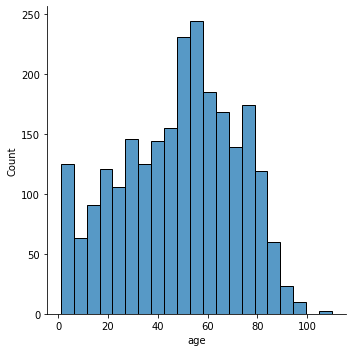

In [78]:
sns.displot(data=df['age'])

In [79]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


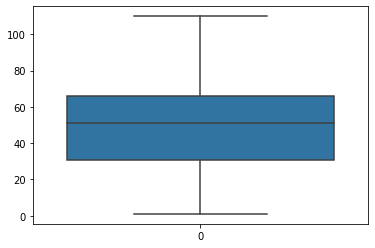

In [81]:
sns.boxplot(data=df['age'])

In [82]:
df['sex'].value_counts(normalize=True)

female    0.573648
male      0.426352
Name: sex, dtype: float64

In [83]:
from pandas.core.groupby import groupby

In [84]:
df_aggr = df.groupby(['sex']).agg({'age':'mean'}).reset_index().rename(columns={'age': 'mean_age'}).sort_values(by=['mean_age'])
df_aggr

,sex,mean_age
1,male,45.527301
0,female,51.033482


In [85]:
df['medical_specialty'].nunique() 

40

In [86]:
df['medical_specialty'].value_counts(normalize=True) * 100

 Surgery                          22.064413
 Consult - History and Phy.       10.322064
 Cardiovascular / Pulmonary        7.441488
 Orthopedic                        7.101420
 Radiology                         5.461092
 General Medicine                  5.181036
 Gastroenterology                  4.600920
 Neurology                         4.460892
 SOAP / Chart / Progress Notes     3.320664
 Obstetrics / Gynecology           3.200640
 Urology                           3.160632
 Discharge Summary                 2.160432
 ENT - Otolaryngology              1.960392
 Neurosurgery                      1.880376
 Hematology - Oncology             1.800360
 Ophthalmology                     1.660332
 Nephrology                        1.620324
 Emergency Room Reports            1.500300
 Pediatrics - Neonatal             1.400280
 Pain Management                   1.240248
 Psychiatry / Psychology           1.060212
 Office Notes                      1.020204
 Podiatry                       

In [87]:
df_aggr_2 = df.groupby(['medical_specialty']).agg({'age':'mean'}).reset_index().rename(columns={'age': 'patient_mean_age'}).sort_values(by=['patient_mean_age'])
df_aggr_2

,medical_specialty,patient_mean_age
29,Pediatrics - Neonatal,10.785714
7,Dentistry,34.000000
24,Obstetrics / Gynecology,34.641026
0,Allergy / Immunology,34.833333
1,Autopsy,35.000000
8,Dermatology,37.142857
11,ENT - Otolaryngology,37.255814
6,Cosmetic / Plastic Surgery,39.214286
18,IME-QME-Work Comp etc.,39.500000
20,Letters,40.750000


In [88]:
df['sample_name'].nunique() # очень много уникальных значений, не думаю, что этот столбец будет полезен для модели

2377

In [89]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [90]:
le = LabelEncoder()
le.fit(df['medical_specialty'])
df['medical_specialty_le']=le.transform(df['medical_specialty'])

In [91]:
le = LabelEncoder()
le.fit(df['sex'])
df['sex_le']=le.transform(df['sex'])

In [92]:
df['age'] = df['age'].fillna(df['age'].mean())

In [93]:
df.head()

,description,medical_specialty,sample_name,transcription,keywords,age,sex,medical_specialty_le,sex_le
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...",allergy / immunology allergic rhinitis allergi...,23.000000,female,0,0
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...",bariatrics laparoscopic gastric bypass weight ...,48.278486,NaN,2,2
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...",bariatrics laparoscopic gastric bypass heart a...,48.278486,NaN,2,2
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...",cardiovascular / pulmonary 2-d m-mode doppler ...,48.278486,NaN,3,2
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,cardiovascular / pulmonary 2-d doppler echocar...,48.278486,NaN,3,2
